# 实验2笔记 (Lab2 Note)

Author: 高鹏昺

Email: nbgao@126.com

## 1. 算法介绍 (Algorithm Introduction)
### 逻辑斯谛回归 (Logistic Regression, LR)

**二项逻辑斯谛回归模型(Binomial logistic regression model)**是一种分类模型,有条件概率分布$P(Y|X)$表示,形式为参数化的逻辑斯谛分布.对于二分类任务,随机变量Y取值为0或1,即$y\in\{0,1\}$,逻辑斯谛回归是将$h(x)$的值在$[0,1]$的区间内.

**逻辑斯谛函数**(logistic函数或sigmoid函数)公式如下:
$$h(x)=\frac{1}{1+e^{-x}}$$
函数图像如下图所示,logistic函数具有以下特点:函数为关于点$(0,0.5)$对称;当线性函数值趋于正无穷时,概率值越接近于1;当线性函数值趋于负无穷时,概率值接近于0.

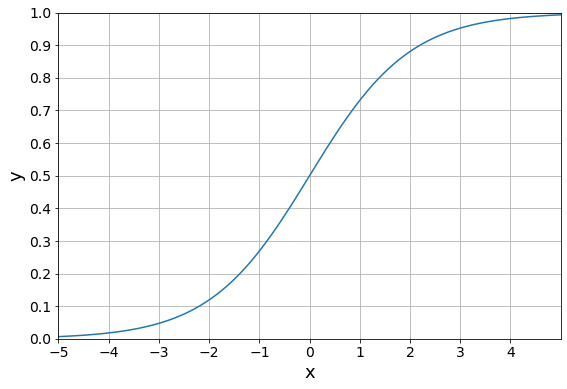

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

x = np.linspace(-5,5,100)
y = 1/(1+np.exp(-x))
plt.figure(figsize=(9,6))
plt.plot(x, y);
plt.xlim(-5, 5)
plt.ylim(0, 1.0)
plt.xticks(np.arange(-5, 5, 1), size=14)
plt.yticks(np.arange(0, 1.01, 0.1), size=14)
plt.xlabel('x', size=18)
plt.ylabel('y', size=18)
plt.grid()

关于逻辑斯谛函数有个重要的数学性质:
$$h^{'}(x)=\frac{e^{-x}}{(1+e^{-x})^2}=\frac{1}{1+e^{-x}}\left(1-\frac{1}{1+e^{-x}}\right)=h(x)\left[1-h(x)\right]$$
 $$ h^{'}(x)=h(x)\left[1-h(x)\right] $$
即Logistic函数的导数可直接由它自身来表示.

逻辑斯谛回归模型的条件概率分布如下:

$$ P(Y=1|x)=h(x)=\frac{1}{1+e^{-w^Tx}} $$
$$ P(Y=0|x)=1-h(x)=\frac{e^{-w^Tx}}{1+e^{-w^Tx}} $$

一个事件的**几率(odds)**是指该事件发生的概率与不发生的概率的比值,假设事件发生的概率为$p$,则该事件的几率为$\frac{p}{1-p}$,该事件的**对数几率(log odds)**或**logit函数**是$logit(p)=log\frac{p}{1-p}$

对于逻辑斯谛回归,其对数几率:
$$ log\frac{P(Y=1|x)}{P(Y=0|x)}=log\frac{P(Y=1|x)}{1-P(Y=1|x)}=log\frac{\frac{1}{1+e^{-w^Tx}}}{\frac{e^{-w^Tx}}{1+e^{-w^Tx}}}=loge^{w^Tx}=w^Tx $$


逻辑斯谛回归模型学习时,对于给定的训练数据$T=\{(x_1,y_1),(x_2,y_2),\dots,(x_N,y_N)\}$,其中$x_i\in \mathbb{R}^n,y_i \in \{0,1\}$,此时可以利用极大似然估计法来估计逻辑回归模型参数.


**似然函数(Likelihood Function)**

假设N个样本独立同分布
$$ L(w)=P(Y|x;w)=\prod_{i=1}^N P(y_i|x_i;w)=\prod_{i=1}^N h(x_i)^y_i \left(1-h(x_i)\right)^{1-y_i} $$

**对数似然函数(Log Likelihood Function)**
$$ logL(w)=\sum_{i=1}^N \left[ y_i logh(x_i) + (1-y_i)log(1-h(x_i)) \right] $$

**最大似然估计(Maximum Likelihood Estimation)**

最大化对数似然函数:
$$ \frac{\partial logL(w)}{\partial w_j} = \left[ \frac{y_i}{h(x_i)}-\frac{1-y_i}{1-h(x_i)} \right]h(x)[1-h(x)] \frac{\partial w^Tx}{\partial w_j} \\
= \left[ y_i(1-h(x_i)) - (1-y_i)h(x_i) \right]x_i^{(j)} = [y_i-h(x_i)]x_i^{(j)}$$

**梯度下降法(Gradient Descent Method)公式**
$$ w^{(j)}\leftarrow w^{(j)}+\alpha \left[ y_i - h(x_i) \right]x_i^{(j)} $$
其中$\alpha$表示学习率(步长).

逻辑斯谛回归也可以从最小化交叉熵损失函数的角度分析

$$ Cost(h(x_i),y_i)= \left\{
\begin{aligned}
-log[h(x_i)] && y_i=1 \\
-log[1-h(x_i)] && y_i=0
\end{aligned}
\right.$$

**交叉熵损失函数(Cross-Entropy Loss Function)**
$$ J(w)=\frac{1}{N}\sum_{i=1}^N Cost(h(x_i), y_i) = -\frac{1}{N}\left[ y_i logh(x_i) + (1-y_i)log(1-h(x_i)) \right] $$

## 2. 参考资料 (Reference)

1. 李航. 统计学习方法[M]. 2012.
2. 邱锡鹏. 神经网络与深度学习
3. https://blog.csdn.net/u014472643/article/details/80662532